In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell
from helper import Helper
from old_helper import OldHelper

In [2]:
xwd = 0.
ywd = 0.
zwd = 0.
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
s = 7
params = {"nseg": 10, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":10}
well = LaplWell(xwd, ywd, zwd, outer_bound, top_bound, bottom_bound, wtype, params)

In [3]:
helper = Helper()
m = helper.get_source_matrix(well, s)
#m = np.zeros((21,21))
#m[:10, 1:11] = np.flip(np.flip(m_, 0), 1)
#m[10:20, 11:] = m_

### Here I cheked right parts

In [4]:
from well import Well
import pandas as pd

In [5]:
ref_df = pd.read_csv('./calibration_points.csv', sep=";", decimal=',')
y_true = ref_df.iloc[:,[2]]
Fcd = float(y_true.columns[0].replace(',', '.'))
ts = np.array(ref_df["Td_xf"])
print("Fcd = {}".format(Fcd))

Fcd = 3.141592654


In [6]:
xw = 0
yw = 0
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 12
nseg = 20
params = {"nseg": nseg, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":Fcd, "ref_length":1.,
         "z_ref_length": 1}
real_well = Well(xw, yw, outer_bound, top_bound, bottom_bound, wtype, params, n_stehf)

In [44]:
t = 1
dys = np.linspace(-1, 1, nseg+1, dtype=np.float)
dxs = np.linspace(-2, 2, nseg+1, dtype=np.float)
pds = np.zeros((len(dxs), len(dys)))
for i in range(len(dxs)):
    for j in range(len(dys)):
        pds[i,j] = real_well.get_p_xd_yd(t, dxs[i], dys[j], zwd)

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [46]:
xv, yv = np.meshgrid(dxs, dys)

In [49]:
dys

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

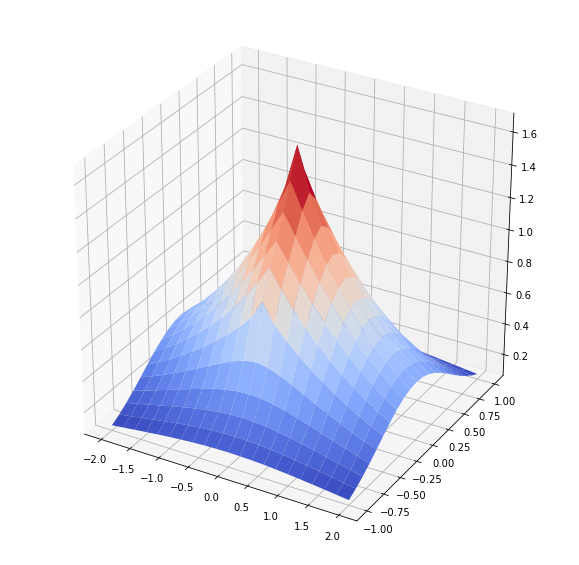

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xv,yv, pds, cmap=cm.coolwarm)

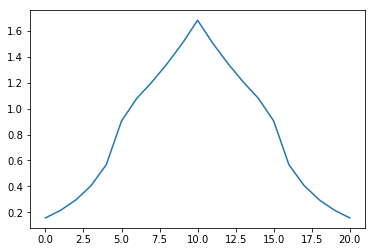

In [50]:
plt.plot(pds[:,10])